In [ ]:
from google.colab import files
upload=files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

print(sns.__version__)

0.13.1


In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

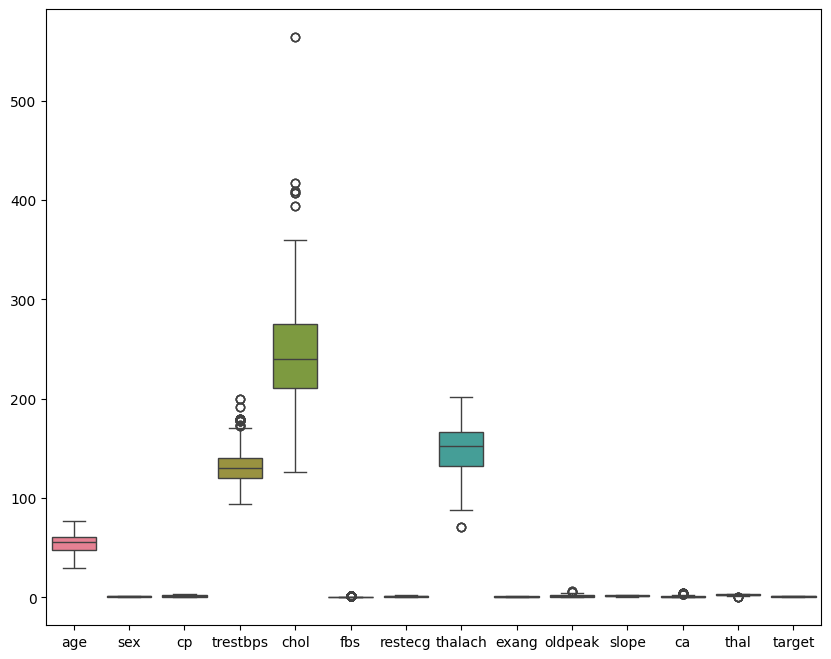

In [ ]:
#check outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

In [ ]:
#remove outliers using quantile
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)


age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [ ]:
df=df[~((df < Q1 - 1.5*IQR) | (df > Q3 + 1.5*IQR)).any(axis=True)]
df.shape

(769, 14)

<Axes: >

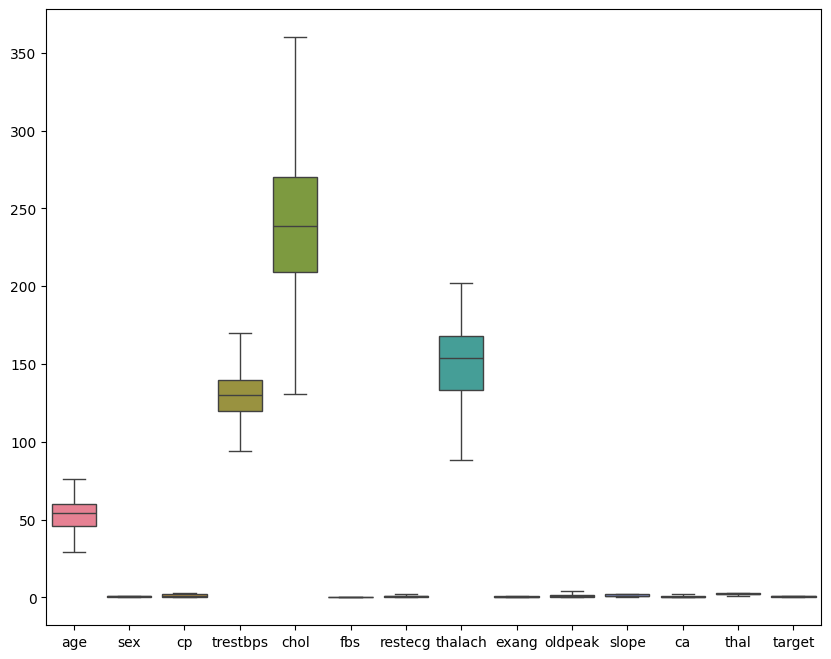

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

<Axes: >

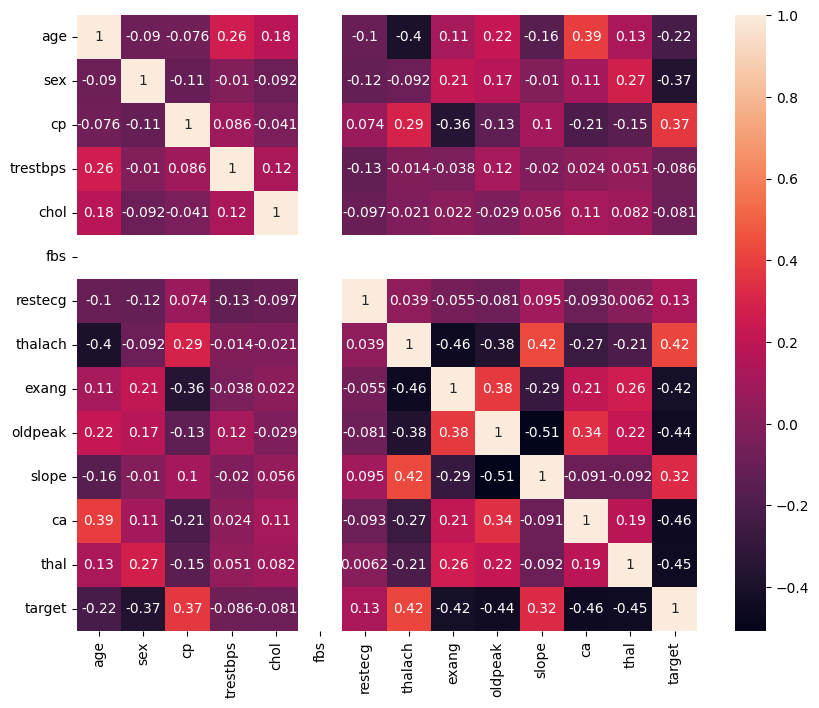

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.431730,0.691808,0.924577,128.685306,242.075423,0.0,0.551365,150.669701,0.323797,0.972432,1.438231,0.495449,2.331599,0.548765
std,9.225098,0.462047,1.019105,15.314066,44.521145,0.0,0.515667,22.567898,0.468228,1.050258,0.589973,0.705479,0.568764,0.497940
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.0,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


## Column details-
#### age
#### sex
#### chest pain
#### resting blood pressures
#### serum cholestrol in mg/dl
#### fasting blood sugar
#### resting electrocardiograph result
#### max heart rate achieved
#### exercise induced angina
#### oldpeak = ST depression induced by exercise relative to rest the slope of the peak exercise ST segment
#### number of major vessels (0-3) coloured by flourosopy
#### thal: 3-normal; 6=fixed defect; 7=reversable defect
#### target

<Axes: xlabel='target', ylabel='count'>

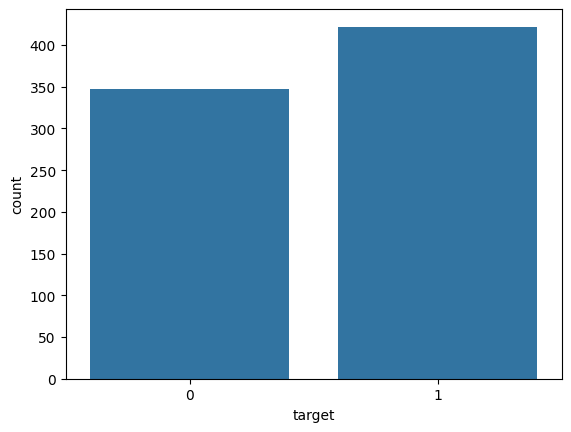

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
#percentage of people with no heart disease
round(len(df[df["target"]==0])/len(df['target'])*100,2)

45.12

In [ ]:
#percentage of people with heart disease
round(len(df[df["target"]==1])/len(df["target"])*100,2)

54.88

In [ ]:
#percentage of females with heart disease
fem=round(len(df[(df["target"]==1) & (df["sex"]==0)])/len(df["target"])*100,2)
print(fem)

25.36


In [ ]:
#percentage of males with heart disease
male=round(len(df[(df["target"]==1) & (df["sex"]==1)])/len(df["target"])*100,2)
print(male)

29.52


Text(0.5, 0, '0=Femal 1=Male')

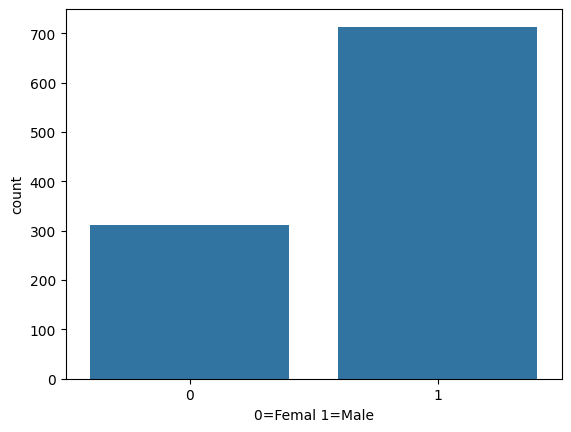

In [ ]:
sns.countplot(x="sex",data=df)
plt.xlabel("0=Femal 1=Male")

In [ ]:
#function to plot graphs
def plotbar(column1,column2,label):
  pd.crosstab(column1,column2).plot(kind="bar",figsize=(20,6))
  plt.xlabel(label)

#function to plot histogram
def histbar(data,xval,hueval,label):
  sns.histplot(data=data,x=xval,kde=True,hue=hueval)
  plt.xlabel(label)

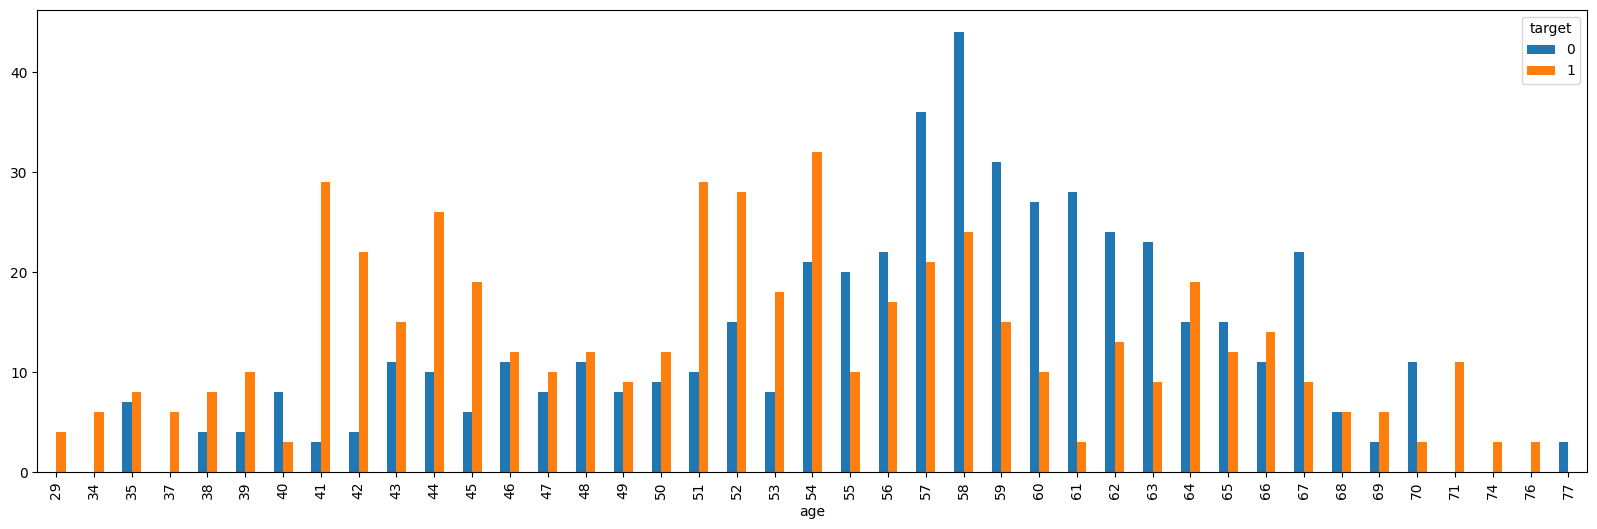

In [ ]:
#pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plotbar(df.age,df.target,"age")


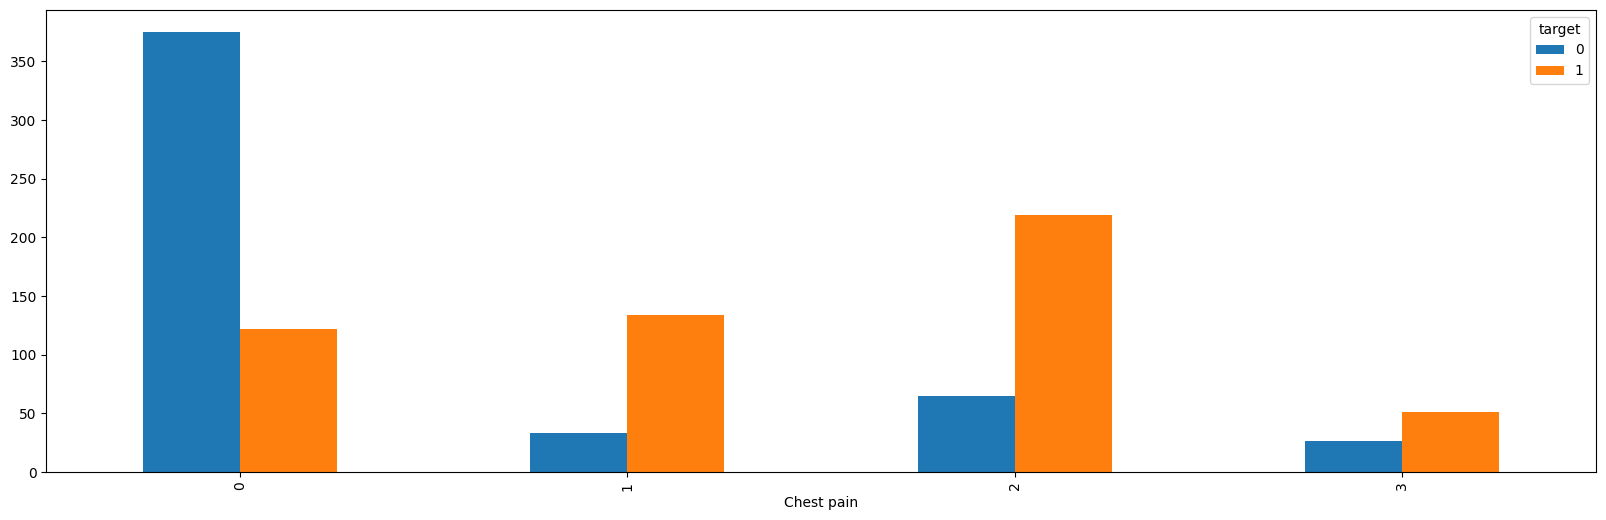

In [ ]:
plotbar(df.cp,df.target,"Chest pain")

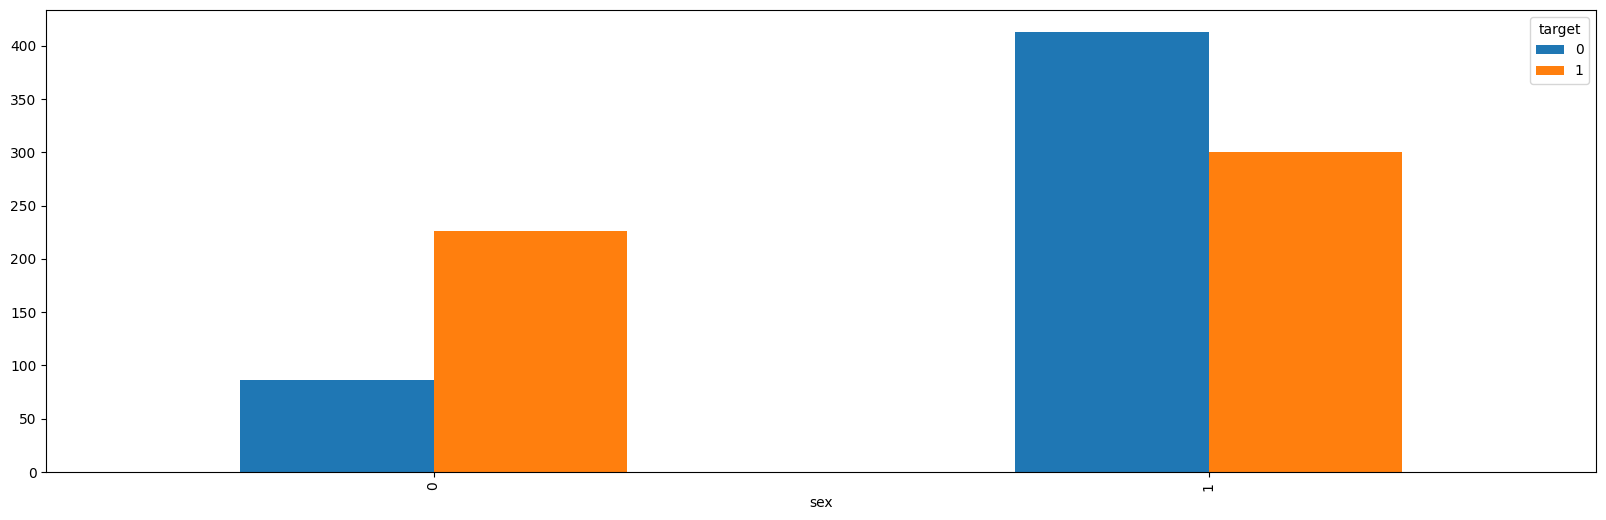

In [ ]:
plotbar(df.sex,df.target,"sex")

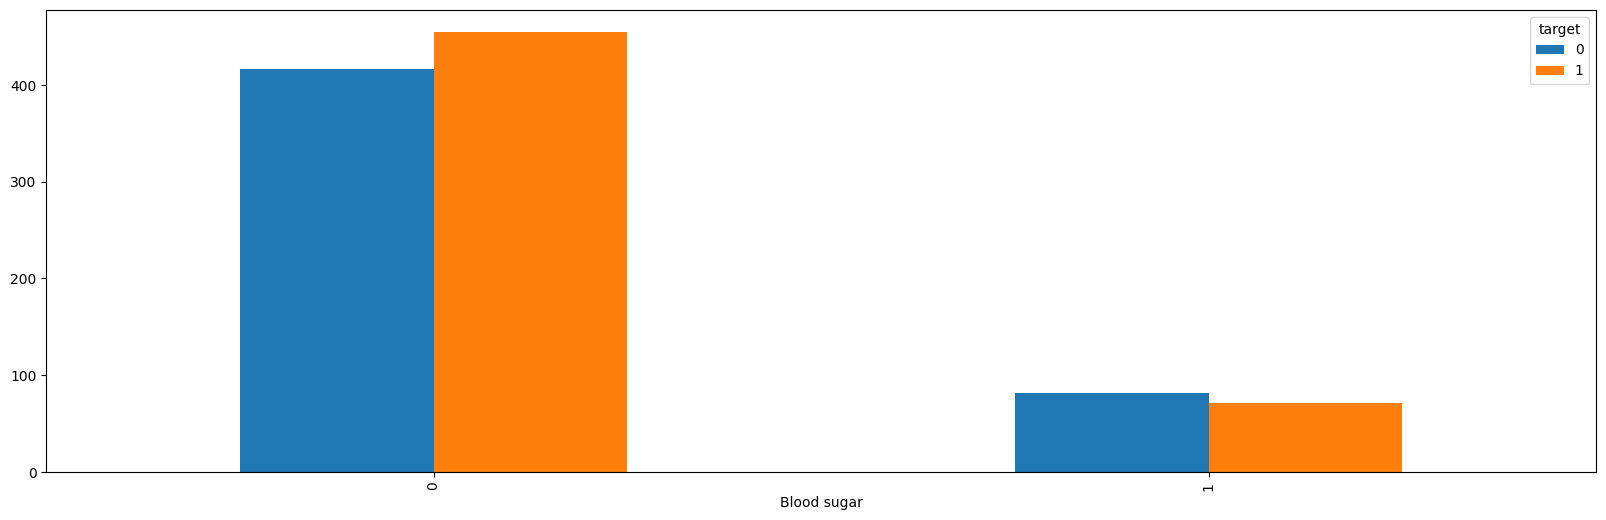

In [ ]:
plotbar(df.fbs,df.target,"Blood sugar")

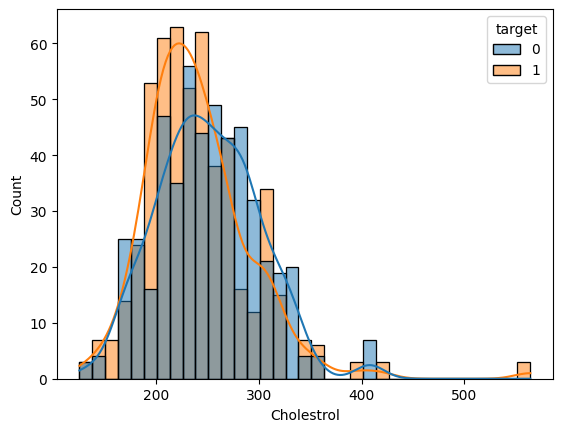

In [ ]:
histbar(df,df.chol,df.target,"Cholestrol")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Column details-
#### age
#### sex
#### chest pain
#### resting blood pressures
#### serum cholestrol in mg/dl
#### fasting blood sugar
#### resting electrocardiograph result
#### max heart rate achieved
#### exercise induced angina
#### oldpeak = ST depression induced by exercise relative to rest the slope of the peak exercise ST segment
#### number of major vessels (0-3) coloured by flourosopy
#### thal: 3-normal; 6=fixed defect; 7=reversable defect
#### target

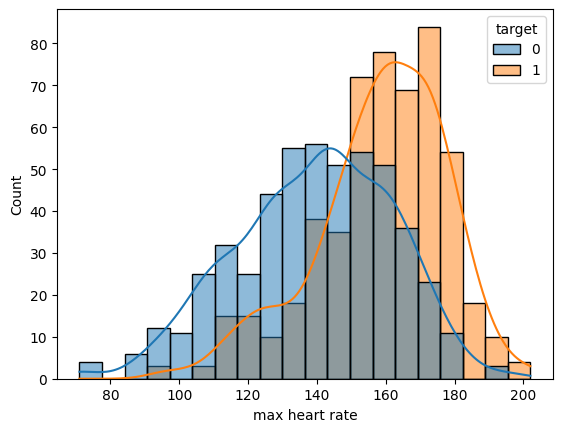

In [ ]:
histbar(df,df.thalach,df.target,"max heart rate")

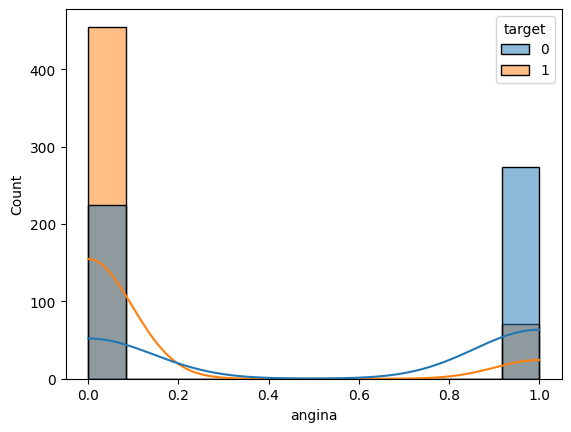

In [ ]:
#plotbar(df.exang,df.target,"exercise induced angina")
histbar(df,df.exang,df.target,"angina")

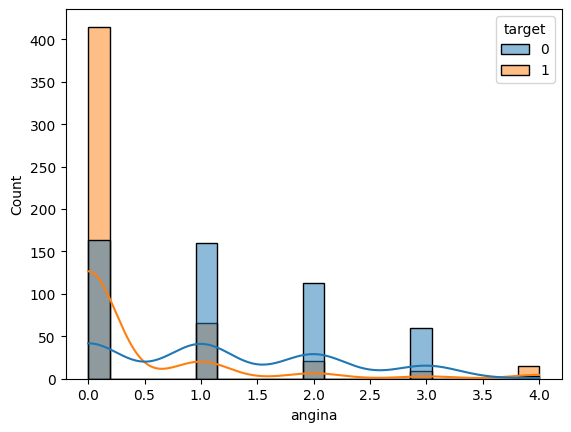

In [ ]:
histbar(df,df.ca,df.target,"angina")

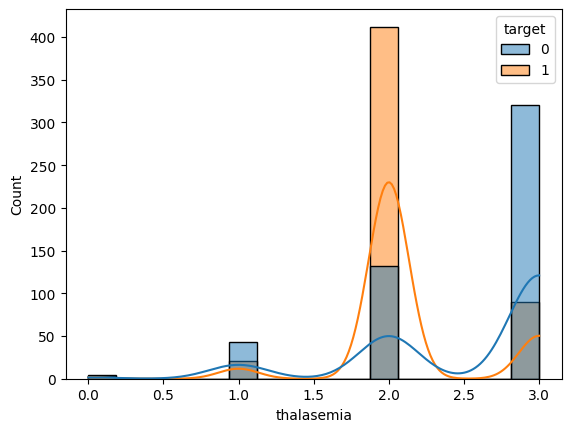

In [ ]:
histbar(df,df.thal,df.target,"thalasemia")

In [ ]:
#scalling
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.155300,1,0,-0.240805,-0.675971,0,1,0.768418,0,0.026266,2,2,3,0
2,1.797168,1,0,1.066034,-1.530053,0,1,-1.138183,1,1.550693,0,0,3,0
3,0.820934,1,0,1.262060,-0.878254,0,1,0.458041,0,-0.926501,2,1,3,0
5,0.495523,0,0,-1.874354,0.133160,0,0,-1.271202,0,0.026266,1,0,2,1
7,0.170111,1,0,2.046163,1.054670,0,0,-0.251392,1,-0.164287,1,1,3,0


In [ ]:
#create dummies
df=pd.get_dummies(df, columns = ['slope', 'ca', 'thal'],drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,slope_1,slope_2,ca_1,ca_2,thal_2,thal_3
0,-0.155300,1,0,-0.240805,-0.675971,0,1,0.768418,0,0.026266,0,0,1,0,1,0,1
2,1.797168,1,0,1.066034,-1.530053,0,1,-1.138183,1,1.550693,0,0,0,0,0,0,1
3,0.820934,1,0,1.262060,-0.878254,0,1,0.458041,0,-0.926501,0,0,1,1,0,0,1
5,0.495523,0,0,-1.874354,0.133160,0,0,-1.271202,0,0.026266,1,1,0,0,0,1,0
7,0.170111,1,0,2.046163,1.054670,0,0,-0.251392,1,-0.164287,0,1,0,1,0,0,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,slope_1,slope_2,ca_1,ca_2,thal_2,thal_3
count,7.690000e+02,769.000000,769.000000,7.690000e+02,7.690000e+02,769.0,769.000000,7.690000e+02,769.000000,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,2.633351e-16,0.691808,0.924577,8.177247e-16,2.437005e-16,0.0,0.551365,-4.804710e-16,0.323797,6.929871e-17,0.548765,0.460338,0.488947,0.248375,0.123537,0.566970,0.382315
std,1.000651e+00,0.462047,1.019105,1.000651e+00,1.000651e+00,0.0,0.515667,1.000651e+00,0.468228,1.000651e+00,0.497940,0.498749,0.500203,0.432351,0.329267,0.495817,0.486269
min,-2.650122e+00,0.000000,0.000000,-2.266405e+00,-2.496515e+00,0.0,0.000000,-2.778747e+00,0.000000,-9.265009e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.061233e-01,0.000000,0.000000,-5.675147e-01,-7.433984e-01,0.0,0.000000,-7.834669e-01,0.000000,-9.265009e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.164057e-02,1.000000,1.000000,8.590468e-02,-6.912276e-02,0.0,1.000000,1.476640e-01,0.000000,-3.548407e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.124635e-01,1.000000,2.000000,7.393241e-01,6.276288e-01,0.0,1.000000,7.684180e-01,1.000000,5.979264e-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.447991e+00,1.000000,3.000000,2.699582e+00,2.650456e+00,0.0,2.000000,2.275963e+00,1.000000,2.884567e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#model
y = df['target']
X = df.drop(['target'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8246753246753247

In [ ]:
score.mean()

0.8277895293495504

In [ ]:
accuracy_score(y_test, y_pred_knn)

0.8246753246753247

In [ ]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=10, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=10, p=1)

In [ ]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)

In [ ]:
score.mean()

0.8520095187731359

In [ ]:
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8571428571428571

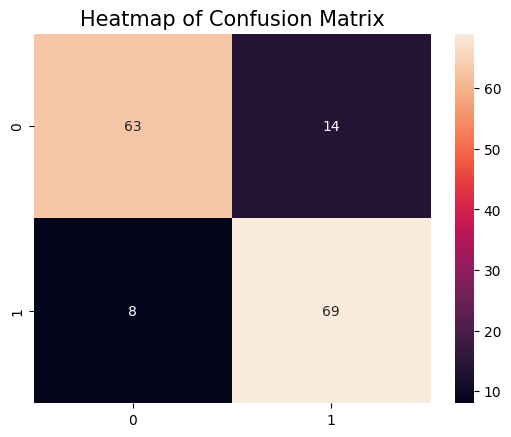

In [ ]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.83      0.90      0.86        77

    accuracy                           0.86       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.86      0.86      0.86       154



In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9805194805194806

In [ ]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.993495505023797

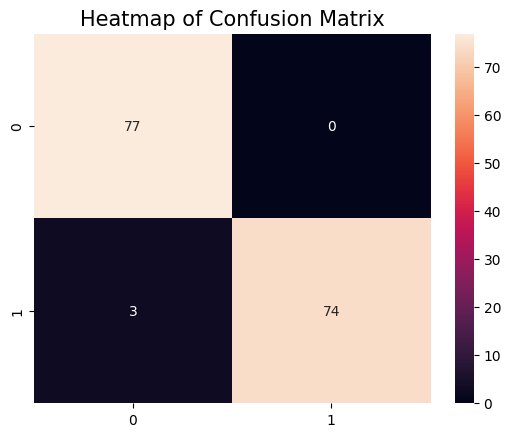

In [ ]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
#save model

## Pickle
import pickle

# save model
pickle.dump(rf_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of Random Forest Classifier model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Random Forest Classifier model = ',accuracy_score(y_test, y_pred))

Confusion matrix of Random Forest Classifier model: 
 [[77  0]
 [ 3 74]] 

Accuracy of Random Forest Classifier model =  0.9805194805194806


In [ ]:
!ls

heart.csv  model.pkl  sample_data


1.25.2
